In [33]:
import pandas as pd
import numpy as np

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
import scipy as sp
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
from torch import nn, optim

In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

               Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
Province/State                                                                
NaN                  Thailand  15.0000  101.0000        2        3        5   
NaN                     Japan  36.0000  138.0000        2        1        2   
NaN                 Singapore   1.2833  103.8333        0        1        3   
NaN                     Nepal  28.1667   84.2500        0        0        0   
NaN                  Malaysia   2.5000  112.5000        0        0        0   

                1/25/20  1/26/20  1/27/20  1/28/20  ...  3/14/20  3/15/20  \
Province/State                                      ...                     
NaN                   7        8        8       14  ...       82      114   
NaN                   2        4        4        7  ...      773      839   
NaN                   3        4        5        7  ...      212      226   
NaN                   1        1        1        1  ...      

Data Cleaning and Visualization

In [5]:
dfn = df.iloc[:, 3:]
print(dfn.head(5))

                1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province/State                                                                  
NaN                   2        3        5        7        8        8       14   
NaN                   2        1        2        2        4        4        7   
NaN                   0        1        3        3        4        5        7   
NaN                   0        0        0        1        1        1        1   
NaN                   0        0        0        3        4        4        4   

                1/29/20  1/30/20  1/31/20  ...  3/14/20  3/15/20  3/16/20  \
Province/State                             ...                              
NaN                  14       14       19  ...       82      114      147   
NaN                   7       11       15  ...      773      839      825   
NaN                   7       10       13  ...      212      226      243   
NaN                   1        1        1  ... 

In [6]:
dfnn=dfn.iloc[:, : 41]
print(dfnn.head(5))

                1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province/State                                                                  
NaN                   2        3        5        7        8        8       14   
NaN                   2        1        2        2        4        4        7   
NaN                   0        1        3        3        4        5        7   
NaN                   0        0        0        1        1        1        1   
NaN                   0        0        0        3        4        4        4   

                1/29/20  1/30/20  1/31/20  ...  2/22/20  2/23/20  2/24/20  \
Province/State                             ...                              
NaN                  14       14       19  ...       35       35       35   
NaN                   7       11       15  ...      122      147      159   
NaN                   7       10       13  ...       85       89       89   
NaN                   1        1        1  ... 

First we try normal regression

In [9]:
confirmed = dfnn.copy()
dates = confirmed.keys()
print(dates)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20'],
      dtype='object')


In [10]:
world_cases = []
for i in dates:
    # calculate sums
    confirmed_sum = confirmed[i].sum()
    world_cases.append(confirmed_sum)

In [11]:
num_days_future = 15
forecast_future = np.array([i for i in range(len(dates)+num_days_future)]).reshape(-1, 1)
adjusted_dates = forecast_future[:-15]
days = np.array([i for i in range(len(dates))]).reshape(-1, 1)
# reshaping the data
world_cases = np.array(world_cases).reshape(-1, 1)

In [14]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
dates_for_forecast_future = []
for i in range(len(forecast_future)):
    dates_for_forecast_future.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [15]:
def plot_stats(x_data, y_data, title, y_label):
    '''
    INPUT - data to be plotted on X-axis and Y-axis and a strings for title, and y-axis label
    
    OUTPUT - function doesn't return anything but prints required plots
    '''
    plt.plot(x_data, y_data)
    plt.title(title)
    plt.xlabel('Days Since Jan 22, 2020')
    plt.ylabel(y_label)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [16]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]

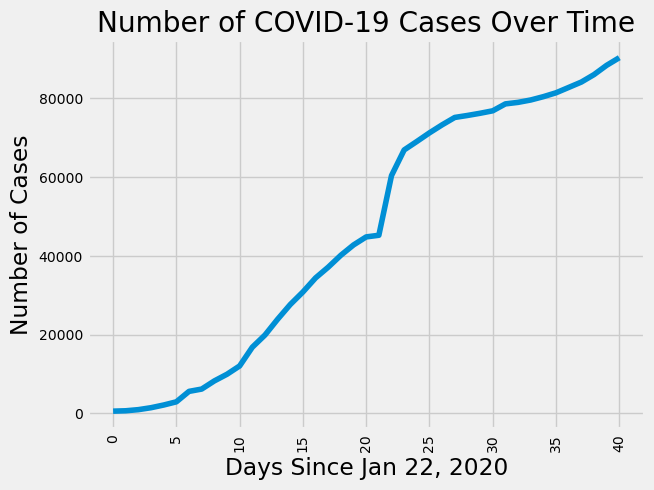

In [17]:
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plot_stats(adjusted_dates, world_cases,'Number of COVID-19 Cases Over Time','Number of Cases')

Trying linear regression

In [18]:
X_confirmed_train, X_confirmed_test, y_confirmed_train, y_confirmed_test = train_test_split(days, world_cases, test_size=0.30, shuffle=False) 

In [28]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)

In [29]:
def execute_linear_model(X_confirmed_train, y_confirmed_train, X_confirmed_test, forecast_future):
    '''
    INPUT - the split data
    
    OUTPUT - executes linear model and prints MAE & MSE, returns predicted values
    '''
    linear_model.fit(X_confirmed_train, y_confirmed_train)
    test_linear_pred = linear_model.predict(X_confirmed_test)
    linear_pred = linear_model.predict(forecast_future)
    print('MAE:', mean_absolute_error(test_linear_pred, y_confirmed_test))
    print('MSE:',mean_squared_error(test_linear_pred, y_confirmed_test))
    return test_linear_pred, linear_pred

In [30]:
def plot_model_predictions(model,y_confirmed_test,test_linear_pred):
    '''
    INPUT - model name, predicted and actual lables
    
    OUTPUT - displays graphs
    '''
    plt.plot(y_confirmed_test)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data',  model+' Regression Predictions'])

In [34]:
test_linear_pred, linear_pred = execute_linear_model(X_confirmed_train, y_confirmed_train,X_confirmed_test,forecast_future)

MAE: 4367.760017760016
MSE: 23592863.193971243


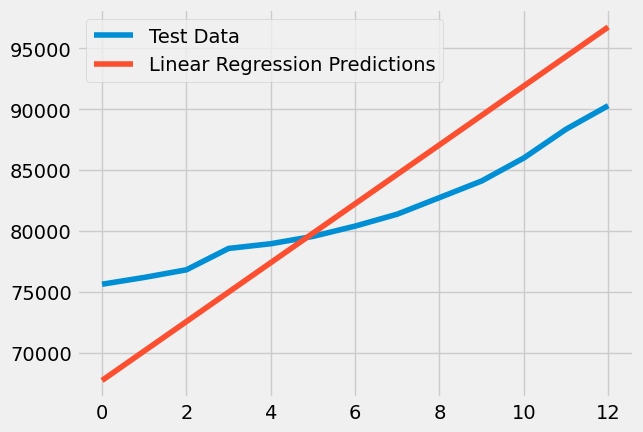

In [35]:
plot_model_predictions('Linear',y_confirmed_test,test_linear_pred)

It can be seen that normal LinearRegression did not work well with the data. 
So we try using Polynomial Regression.

In [36]:
# transform our data for polynomial variants of linear regression
def transform_to_poly(degree=2):
    '''
    INPUT - degree 
    
    OUTPUT - returns the transformed data
    
    Transorms data into required polymonial degree
    '''
    poly = PolynomialFeatures(degree)
    poly_X_confirmed_train = poly.fit_transform(X_confirmed_train)
    poly_X_confirmed_test = poly.fit_transform(X_confirmed_test)
    poly_forecast_future = poly.fit_transform(forecast_future)
    
    return poly_X_confirmed_train, poly_X_confirmed_test, poly_forecast_future

In [37]:
poly_2_X_confirmed_train, poly_2_X_confirmed_test, poly_2_forecast_future = transform_to_poly(degree = 2)

In [38]:
test_ploy_2_pred, poly_2_pred = execute_linear_model(poly_2_X_confirmed_train,y_confirmed_train,poly_2_X_confirmed_test,poly_2_forecast_future)

MAE: 41320.33956464982
MSE: 2100609286.1406837


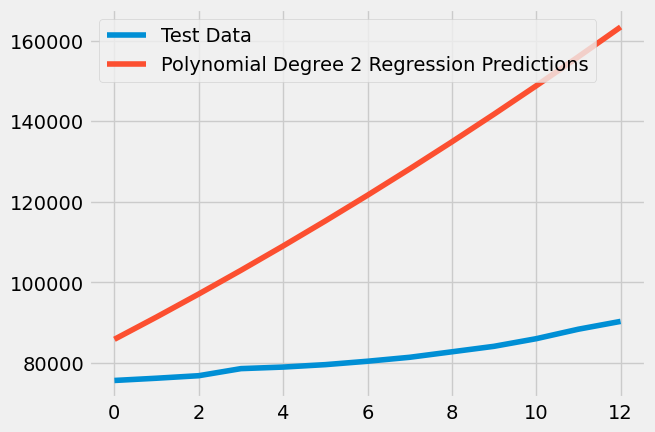

In [41]:
plot_model_predictions('Polynomial Degree 2',y_confirmed_test,test_ploy_2_pred)

Average of predictions of Regression models

In [42]:
test_avg_pred = []
for i in range(0,len(test_ploy_2_pred)):
    temp = float(test_ploy_2_pred[i]+test_linear_pred[i])/2
    test_avg_pred.append(temp)

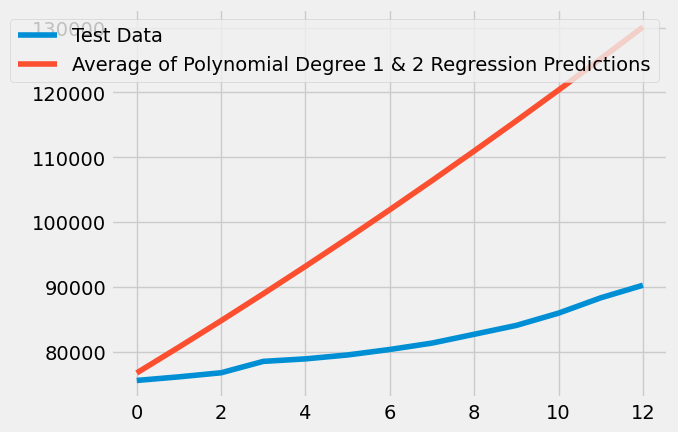

In [43]:
plot_model_predictions('Average of Polynomial Degree 1 & 2',y_confirmed_test,test_avg_pred)

In [44]:
print('MAE:', mean_absolute_error(test_avg_pred, y_confirmed_test))
print('MSE:',mean_squared_error(test_avg_pred, y_confirmed_test))

MAE: 21048.955552110678
MSE: 593714507.4887518


This is also not near the actual data, so we try LSTM now.

In [6]:
#pd.set_option('display.max_columns', None)

In [45]:
daily_cases = dfnn.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.head()

2020-01-22    555
2020-01-23     98
2020-01-24    288
2020-01-25    493
2020-01-26    684
dtype: int64

(array([18283., 18293., 18300., 18307., 18314., 18322.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

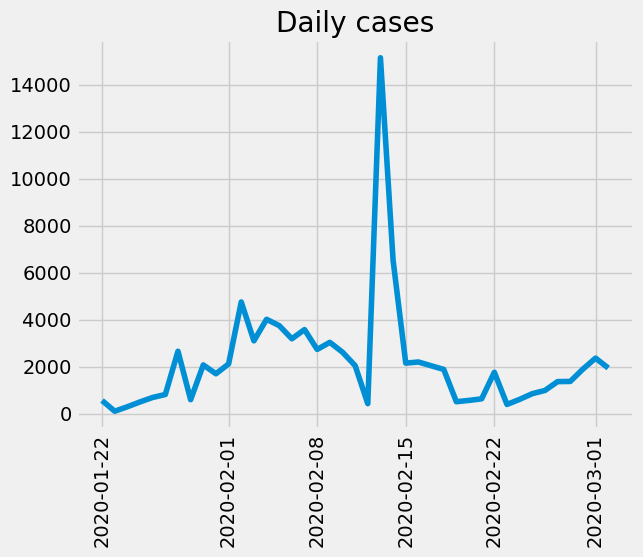

In [46]:
plt.plot(daily_cases)
plt.title("Daily cases");
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

The huge spike (in the middle) is mostly due to a change of criteria for testing patients in China. This will certainly be a challenge for our model.

In [48]:
daily_cases.shape

(41,)

We have data for 41 days!

We'll reserve the first 27 days for training and use the rest for testing:

In [49]:
test_data_size = 14

train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]

train_data.shape

(27,)

Preprocessing

In [50]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

In [51]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [52]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [53]:
X_train.shape

torch.Size([21, 5, 1])

In [54]:
X_train[:2]

tensor([[[0.0304],
         [0.0000],
         [0.0126],
         [0.0262],
         [0.0389]],

        [[0.0000],
         [0.0126],
         [0.0262],
         [0.0389],
         [0.0472]]])

In [55]:
y_train.shape

torch.Size([21, 1])

In [56]:
y_train[:2]

tensor([[0.0472],
        [0.1696]])

In [57]:
train_data[:10]

array([[0.03036747],
       [0.        ],
       [0.01262542],
       [0.02624759],
       [0.03893946],
       [0.04724566],
       [0.16964582],
       [0.0325603 ],
       [0.13090571],
       [0.10598711]])

In [58]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [59]:
def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 50

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

In [60]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
8  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 1.730264663696289 test loss: 0.05548999831080437
Epoch 10 train loss: 0.8435617685317993 test loss: 0.11640461534261703
Epoch 20 train loss: 0.8333922028541565 test loss: 0.14253446459770203
Epoch 30 train loss: 0.8193471431732178 test loss: 0.211495503783226
Epoch 40 train loss: 0.8207811713218689 test loss: 0.15926885604858398


84.9% accuracy achieved

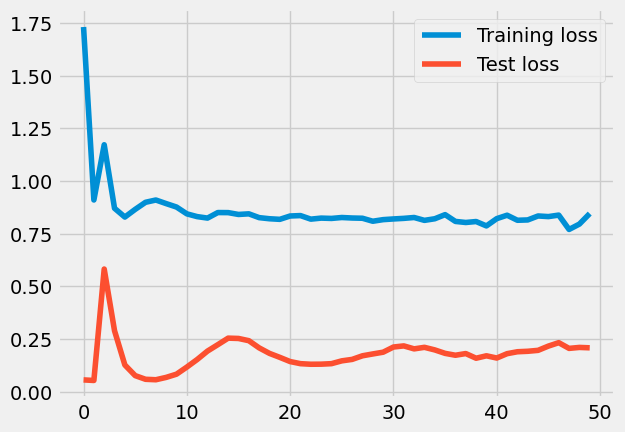

In [61]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
#plt.ylim((0, 5))
plt.legend();

In [62]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

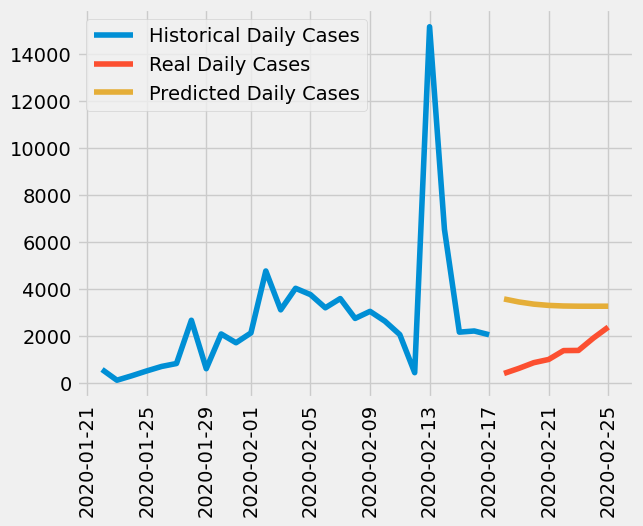

In [63]:
plt.plot(
  daily_cases.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.legend();

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

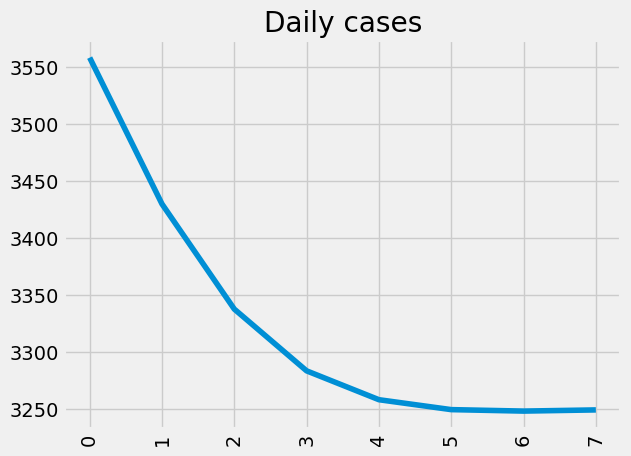

In [64]:
plt.plot(predicted_cases)
plt.title("Daily cases");
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

In [65]:
print(predicted_cases)

[3558.02436751 3429.67066188 3337.46476832 3283.31122148 3257.99367028
 3249.29690084 3248.01106524 3249.04708904]


In [66]:
print(true_cases)

[ 386.  603.  845.  982. 1359. 1366. 1891. 2358.]


In [67]:
atrue_cases= true_cases+2000

In [68]:
print(atrue_cases)

[2386. 2603. 2845. 2982. 3359. 3366. 3891. 4358.]


In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

Statistical Validation and Analysis

In [70]:
forecast_error = true_cases - predicted_cases
mean_forecast_error = mean(forecast_error)
print(mean_forecast_error)

-2102.8524680752303


In [71]:
expected = atrue_cases
predictions = predicted_cases
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 507171.090303


In [72]:
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 712.159456
